<a href="https://colab.research.google.com/github/ASBRUC/DSPS_ABruce/blob/main/HW10/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import pylab as np
import matplotlib.pyplot as plt

In [121]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [122]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [123]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [124]:
x_train.shape

(60000, 28, 28)

In [125]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [126]:
x_train.shape

(60000, 28, 28, 1)

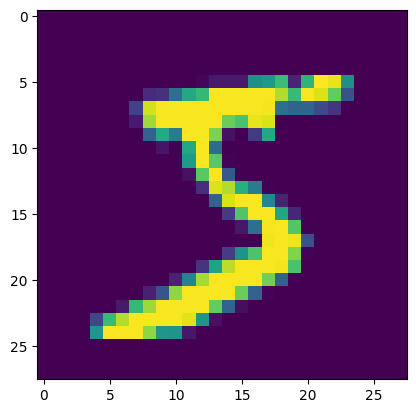

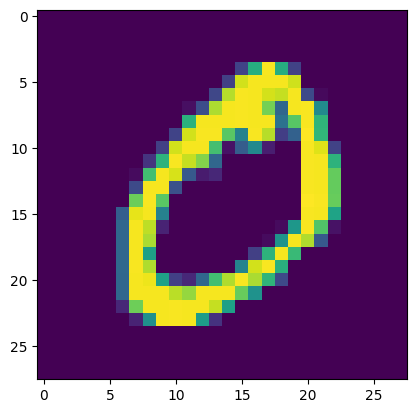

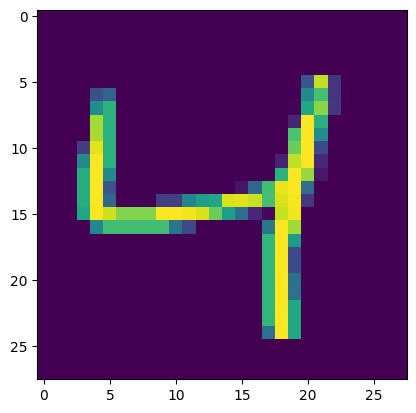

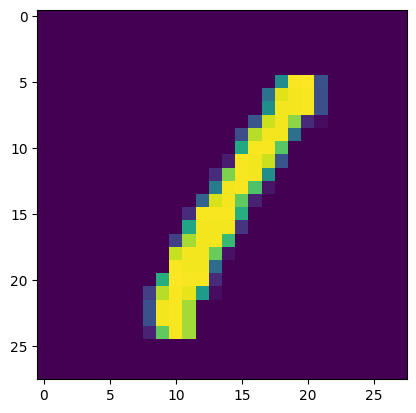

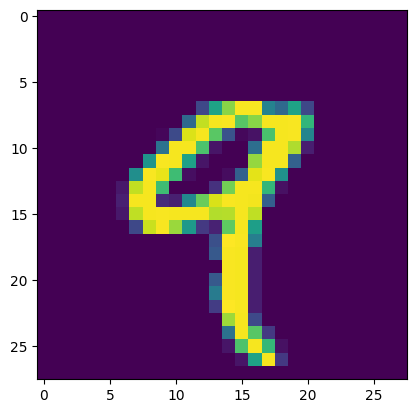

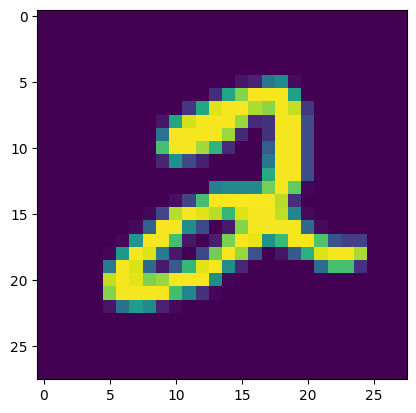

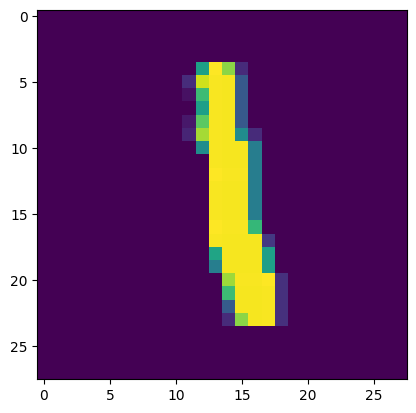

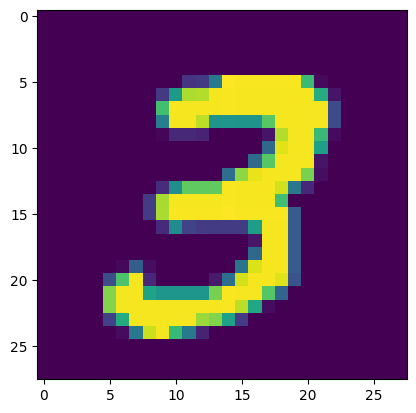

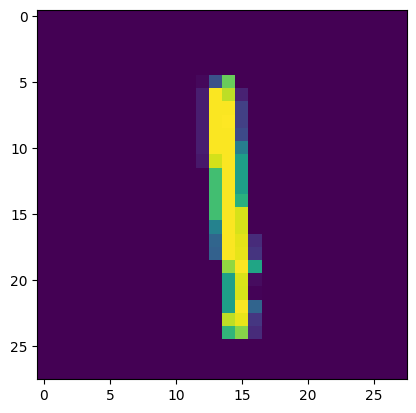

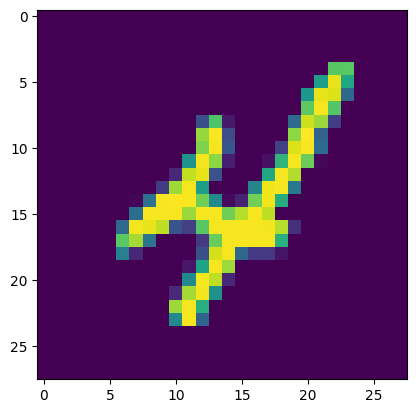

In [127]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [128]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [129]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [130]:
x_train.shape

(60000, 28, 28, 1)

In [131]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [132]:
x_trainraveled.shape

(60000, 784)

In [133]:
#non-convolution
mlp = keras.Sequential([
    layers.Dense(320, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax') #for probability, Sum = 1
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])#cross entropy best for classification

In [135]:
history = mlp.fit(x_trainraveled, y_train, batch_size = 120, epochs=10, validation_split = 0.25, verbose = 1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7988 - loss: 0.6841 - val_accuracy: 0.9465 - val_loss: 0.1831
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9566 - loss: 0.1477 - val_accuracy: 0.9595 - val_loss: 0.1398
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.0975 - val_accuracy: 0.9633 - val_loss: 0.1208
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0671 - val_accuracy: 0.9694 - val_loss: 0.1006
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0478 - val_accuracy: 0.9693 - val_loss: 0.1083
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0359 - val_accuracy: 0.9717 - val_loss: 0.1004
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accuracy: 0.9723 - val_loss: 0.1045
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0215 - val_accuracy: 0.

In [136]:
history.history

{'accuracy': [0.8934666514396667,
  0.9592000246047974,
  0.9724444150924683,
  0.9797555804252625,
  0.9859333038330078,
  0.9891777634620667,
  0.9918222427368164,
  0.9924666881561279,
  0.9929333329200745,
  0.9948889017105103],
 'loss': [0.37228676676750183,
  0.13982750475406647,
  0.09223896265029907,
  0.06678472459316254,
  0.046973634511232376,
  0.035808540880680084,
  0.028223296627402306,
  0.02398223802447319,
  0.02068379335105419,
  0.015290961600840092],
 'val_accuracy': [0.9465333223342896,
  0.9595333337783813,
  0.9632666707038879,
  0.9693999886512756,
  0.9693333506584167,
  0.971666693687439,
  0.9723333120346069,
  0.9697999954223633,
  0.9715333580970764,
  0.9697999954223633],
 'val_loss': [0.1830827295780182,
  0.1397637575864792,
  0.12075760960578918,
  0.10061264783143997,
  0.10832896828651428,
  0.10043781995773315,
  0.10452120751142502,
  0.10495758801698685,
  0.11309458315372467,
  0.11811685562133789]}

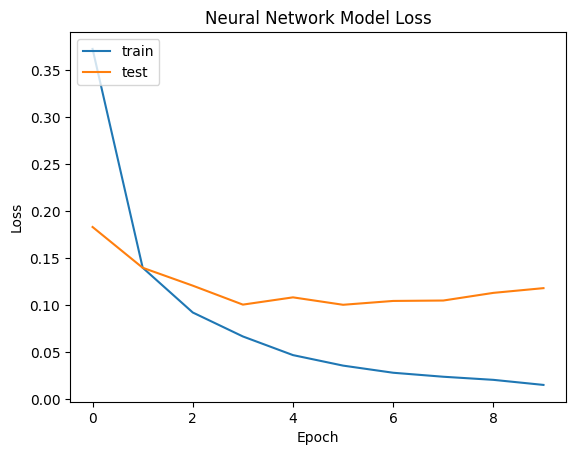

In [137]:
#Plot epoch vs loss function for test and training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

**Figure 1:** Shown above is a line plot of the loss function over multiple epochs. <br>
The training loss is represented by the blue line and the testing loss is represented by the orange line. <br>
From the plot, we can see that both the training and testing data respectivve loss function gernerally decrease over the epochs which is good. The point before the testing loss is significantly higher than the training loss is epoch 1 or epioch 2. These points are safe from overfitting and have loss values around 0.13.

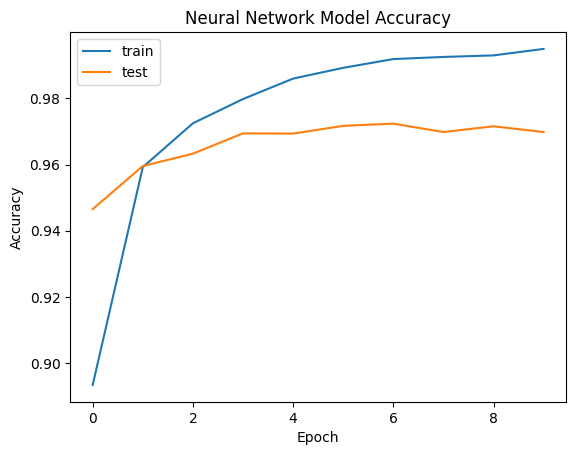

In [138]:
#Plot the accuracy of the epoch for the train and testing
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

**Figure 2:** Above is a line plot of the accuracy of testing and training data across all epochs for a non-convoluted neural network. <br> The blue line represents the training accuracy and the orange line reprsents the testing accuracy. <br>
The ideal epoch for parameters is at epoch 1 or 2 around accuracy values of 0.96 because there is a small difference to no between the training and testing. After those points, there is a higher chance of overfitting.

In [139]:
#convolution
#Code taken from tensor flow tutorial: https://www.tensorflow.org/tutorials/images/cnn
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 120, epochs=10, validation_split = 0.25, verbose = 1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8494 - loss: 0.5249 - val_accuracy: 0.9726 - val_loss: 0.0913
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0789 - val_accuracy: 0.9777 - val_loss: 0.0739
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0507 - val_accuracy: 0.9793 - val_loss: 0.0681
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9844 - val_loss: 0.0530
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9838 - val_loss: 0.0519
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.9855 - val_loss: 0.0539
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9851 - val_loss: 0.0528
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.

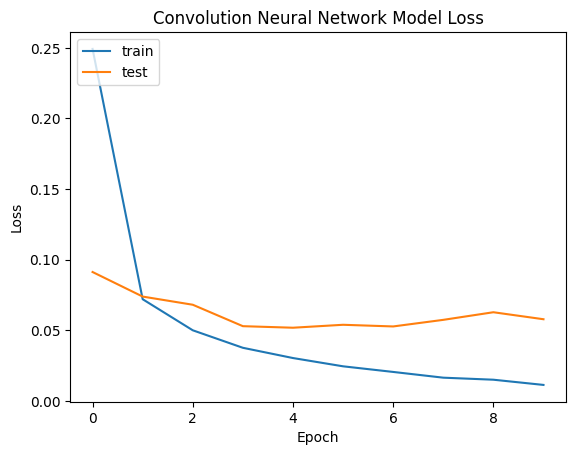

In [141]:
#Plot convolutional epoch vs loss function for test and training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Convolution Neural Network Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

**Figure 3:** Shown above is a line plot of the loss function over multiple epochs for a Convolution Neural Network . <br>
The training loss is represented by the blue line and the testing loss is represented by the orange line. <br>
From the plot, we can see that both the training and testing data respective loss function decrease or stay the same over the epochs which is good. The point before the testing loss is significantly higher than the training loss is epoch 1-2. Compared to the non-convoluted neural network, the training and testing both have lower loss function values, which would indicate that the convolution neural network is more effective.

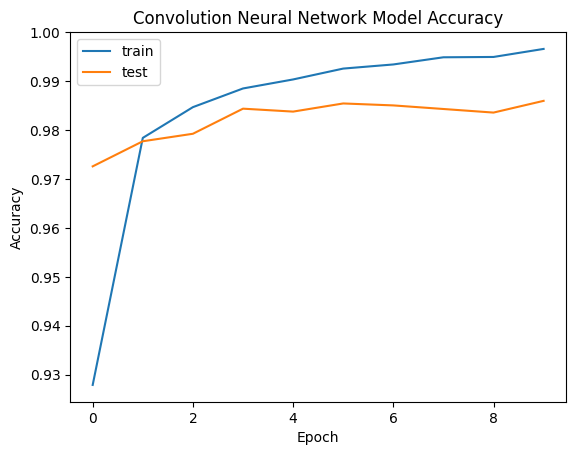

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Convolution Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Figure 4:** Above is a line plot of the accuracy of testing and training data across all epochs for a non-convoluted neural network. <br> The blue line represents the training accuracy and the orange line reprsents the testing accuracy. <br>
The ideal epoch for parameters is at epoch 1 or 2 with accuracy values of 0.975 because there is a small difference to no between the training and testing. After those points, there is a higher chance of overfitting. The overall accuracy is greater when compared to the non-convoluted neural network, so it could be said that the convolution is working better in this aspect.